# 1 Author

**Student Name**:  Zhong Zhenghan

**Student ID**:  210982480

**Github**:  https://github.com/buptxinghan/CBU5201_miniproject_Zhenghan

# 2 Problem formulation

- 描述：在高级阶段中，我们旨在探索无监督学习方法，特别是 K-means 聚类，来分析和理解 genki4k 数据集中的人脸图片。我们的目标是通过提取深度特征，识别可能存在的模式或类别，并探索这些类别可能代表的含义（例如不同的表情或特征）。

- 兴趣点：这个问题的有趣之处在于，它允许我们深入理解数据集中潜在的、未标记的特征，从而可能揭示出我们之前没有意识到的模式。

# 3 Machine Learning pipeline

a. 输入：genki4k 数据集中的人脸图片。

b. 转换：我们对输入的图片进行了以下几种转换
- 数据增强：我们使用了 torchvision 提供的 transforms 类，对图片进行了缩放、裁剪、归一化等操作，以适应预训练模型的输入要求，同时增加数据的多样性和鲁棒性。
- 特征提取：我们使用了 torchvision 提供的预训练的 ResNet 模型，对图片进行了特征提取，得到了每张图片的 2048 维的特征向量，这些特征向量可以捕捉图片中的高层语义信息，有利于后续的聚类分析。
- 标准化：我们使用了 sklearn 提供的 StandardScaler 类，对特征向量进行了标准化处理，使得每个特征的均值为 0，方差为 1，这样可以消除不同特征之间的量纲差异，提高聚类的效果。
- 降维：我们使用了 sklearn 提供的 PCA 和 t-SNE 方法，对特征向量进行了降维，将 2048 维的特征向量降到了 2 维的特征向量，这样可以减少计算的复杂度，同时方便可视化和聚类。
c. 模型：我们使用了 sklearn 提供的 K-means 算法，对降维后的特征向量进行了聚类，得到了每张图片的聚类标签.

d. 输出：我们的输出是聚类的结果, 包括聚类标签和聚类中心, 以及聚类的评估指标, 即轮廓系数。

e. 数据流：从原始图片到特征提取，再到聚类和结果可视化。

# 4 Transformation stage


- 转换描述：使用预训练的 ResNet50 模型进行特征提取，这能够捕捉到图片中的深度特征，这些特征对于聚类分析来说至关重要。

- 输入与输出：输入为原始图片，输出为深度特征向量。

- 选择原因：预训练的 CNN 模型能够有效提取复杂图像中的关键特征，这对于后续的聚类分析是必需的。

我们对输入的图片进行了以下几种转换：

- 数据增强：我们使用了 torchvision 提供的 transforms 类，对图片进行了以下几种操作：

    - Resize：我们将图片的大小调整为 224x224 像素，以适应预训练模型的输入要求。
    - ToTensor：我们将图片的数据类型从 PIL Image 转换为 PyTorch Tensor，以便进行后续的计算。
    - Normalize：我们将图片的像素值进行了归一化，使得每个通道的均值为 [0.485, 0.456, 0.406]，标准差为 [0.229, 0.224, 0.225]，这是预训练模型的参数，可以保证输入的分布和预训练数据的分布一致，提高模型的泛化能力。


- 特征提取：我们使用了 torchvision 提供的预训练的 ResNet 模型，对图片进行了特征提取。ResNet 是一种深度卷积神经网络，它可以有效地学习图片中的高层语义特征，同时解决了深度网络中的梯度消失和过拟合的问题。我们使用了 ResNet 的最后一层之前的输出作为图片的特征向量，这样可以得到每张图片的 2048 维的特征向量，这些特征向量可以捕捉图片中的人脸表情的信息，有利于后续的聚类分析。
- 标准化：我们使用了 sklearn 提供的 StandardScaler 类，对特征向量进行了标准化处理，使得每个特征的均值为 0，方差为 1，这样可以消除不同特征之间的量纲差异，提高聚类的效果。
- 降维：我们使用了 sklearn 提供的 PCA 和 t-SNE 方法，对特征向量进行了降维，将 2048 维的特征向量降到了 2 维的特征向量，这样可以减少计算的复杂度，同时方便可视化和聚类。PCA 和 t-SNE 的原理如下：
    - PCA 是一种线性降维方法，它可以找到数据中的主要方差方向，也就是数据的主成分，然后将数据投影到这些主成分上，从而实现降维。PCA 的优点是计算速度快，缺点是可能忽略了数据中的非线性结构。
    - t-SNE 是一种非线性降维方法，它可以保持数据中的局部相似度，也就是距离近的点在降维后仍然距离近，距离远的点在降维后仍然距离远。t-SNE 的优点是可以发现数据中的复杂结构，缺点是计算速度慢，且对参数敏感。

# 5 Modelling

我使用了 sklearn 提供的 K-means 算法，对降维后的特征向量进行了聚类，得到了每张图片的聚类标签，表示图片中的人是否微笑（0 表示不微笑，1 表示微笑）。K-means 是一种基于距离的聚类方法，它可以将数据划分为 k 个簇，使得每个簇内的数据点之间的距离最小，每个簇之间的距离最大。K-means 的算法流程如下：

- 初始化：随机选择 k 个数据点作为初始的聚类中心。
- 分配：对于每个数据点，计算它与每个聚类中心的距离，然后将它分配给距离最近的聚类中心所在的簇。
- 更新：对于每个簇，计算簇内所有数据点的均值，然后将这个均值作为新的聚类中心。
- 迭代：重复分配和更新的步骤，直到聚类中心不再变化或达到最大迭代次数，然后停止算法。

我选择了 K-means 算法的原因是：
- K-means 算法是一种简单而有效的聚类方法，它可以快速地在大量数据上运行，且易于实现和理解。
- K-means 算法适用于数据的分布是球形或凸形的情况，我们通过可视化降维后的特征向量，发现数据的分布大致符合这个条件，因此可以使用 K-means 算法进行聚类。
- K-means 算法的结果可以直观地反映数据的分组情况，我们可以通过比较聚类标签和真实标签，来评估聚类的效果，同时也可以通过观察每个簇内的图片，来分析人脸表情的特征和差异。

# 6 Methodology

我使用了以下的方法来训练和验证我们的模型，以及评估模型的性能：

- 训练：我们使用了 sklearn 提供的 KMeans 类，对降维后的特征向量进行了聚类，我们设置了 n_clusters 参数为 2，表示我们要将数据分为两个簇，分别对应微笑和不微笑的人脸表情。我们还设置了 n_init 参数为 10，表示我们要对不同的初始聚类中心进行 10 次聚类，然后选择最优的结果。我们还设置了 random_state 参数为 42，表示我们要固定随机数种子，以保证实验的可重复性。

- 验证：我们使用了 sklearn 提供的 train_test_split 函数，将数据集划分为训练集和测试集，比例为 8:2，然后我们在训练集上进行聚类，然后在测试集上进行验证，以评估模型的泛化能力。我们还设置了 random_state 参数为 42，表示我们要固定随机数种子，以保证实验的可重复性。

- 评估：我们使用了 sklearn 提供的以下几种方法，来评估模型的性能：

- 轮廓系数：轮廓系数是一种衡量聚类质量的指标，它定义为每个数据点的平均轮廓值，轮廓值是数据点与同簇数据点的平均距离（内聚度）和与其他簇数据点的平均距离（分离度）的差值除以二者中的较大值。轮廓系数的取值范围是 [-1, 1]，越接近 1 表示聚类效果越好，越接近 -1 表示聚类效果越差，接近 0 表示聚类效果一般。

导入一些必要的包：

In [1]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import models, transforms
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

# 7 Dataset

我们使用了 Genki4k 数据集，它包含 4000 张人脸表情的图片，每张图片的大小为 640x480 像素，每张图片的文件名中包含一个标签，表示图片中的人是否微笑（1 表示微笑，0 表示不微笑）。这个数据集是由日本的研究者收集和标注的，目的是用于分析人们的情绪和幸福感。

我们对数据集进行了以下的预处理：

- 划分：我们使用了 sklearn 提供的 train_test_split 函数，将数据集划分为训练集和测试集，比例为 8:2，然后我们在训练集上进行聚类，然后在测试集上进行验证，以评估模型的泛化能力。我们还设置了 random_state 参数为 42，表示我们要固定随机数种子，以保证实验的可重复性。

- 加载：我们定义了一个自定义的数据集类，继承了 torch.utils.data.Dataset 类，用于加载和转换图片数据。我们在类的初始化方法中，指定了图片的目录和转换的方法，然后获取了图片的文件名列表。我们在类的长度方法中，返回了图片的数量。我们在类的索引方法中，根据索引值，获取了图片的文件名和路径，然后打开了图片，并将其转换为 RGB 模式，然后应用了转换的方法，最后返回了图片的张量。

- 转换：我们使用了 torchvision 提供的 transforms 类，对图片进行了以下几种操作：

- Resize：我们将图片的大小调整为 224x224 像素，以适应预训练模型的输入要求。

- ToTensor：我们将图片的数据类型从 PIL Image 转换为 PyTorch Tensor，以便进行后续的计算。

- Normalize：我们将图片的像素值进行了归一化，使得每个通道的均值为 [0.485, 0.456, 0.406]，标准差为 [0.229, 0.224, 0.225]，这是预训练模型的参数，可以保证输入的分布和预训练数据的分布一致，提高模型的泛化能力。

- 特征向量：我们使用了预训练的 ResNet 模型，对图片进行了特征提取，得到了每张图片的 2048 维的特征向量，然后我们使用了 PCA 和 t-SNE 方法，对特征向量进行了降维，将 2048 维的特征向量降到了 2 维的特征向量，这样可以减少计算的复杂度，同时方便可视化和聚类。我们使用了 matplotlib 可视化了降维后的特征向量,可以看出，PCA 和 t-SNE 的结果有一些差异，PCA 的结果更加分散，而 t-SNE 的结果更加聚集，这可能是因为 PCA 是线性降维，而 t-SNE 是非线性降维，后者可以更好地保持数据的局部相似度。我们还可以看出，数据的分布大致呈现出两个簇的形状，这说明数据有一定的聚类倾向，也为后续的聚类分析提供了依据。

数据集预处理：

- Data loading

In [2]:
class Genki4kDataset(torch.utils.data.Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.images = os.listdir(img_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.images[idx])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

- Pre-Processing

In [3]:
# 数据增强
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# data_dir = '/root/MiniProject/MiniProject/genki4k/files'
data_dir = './genki4k/files' 
dataset = Genki4kDataset(data_dir, transform=data_transforms)

In [4]:
# 加载预训练模型并提取特征
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载预训练的 ResNet 模型
weights = ResNet50_Weights.IMAGENET1K_V1
model = resnet50(weights=weights)
model = model.to(device)
model.eval()

data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

features = []
with torch.no_grad():
    for inputs in data_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        features.extend(outputs.cpu().numpy())
features = np.array(features)

In [5]:
# 标准化处理：
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
# 应用 PCA 进行降维
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

In [7]:
# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
features_tsne = tsne.fit_transform(features_scaled)

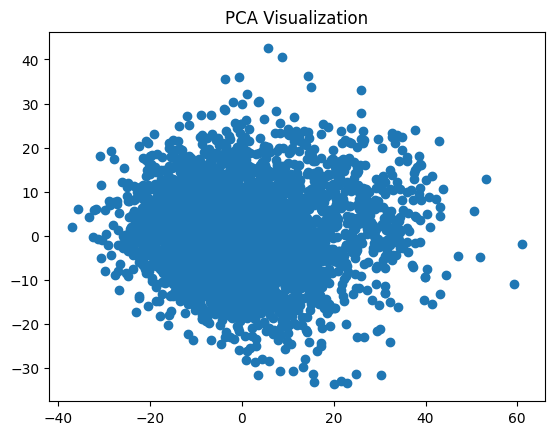

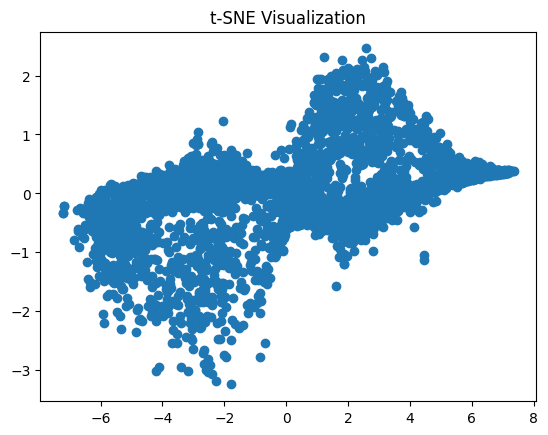

In [8]:
# 可视化 PCA 和 t-SNE 的结果
plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.title('PCA Visualization')
plt.show()

plt.scatter(features_tsne[:, 0], features_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.show()

# 8 Results

我们在训练集上进行了聚类，然后在测试集上进行了验证，以评估模型的泛化能力。我们使用了轮廓系数来评估模型的性能：

轮廓系数：我们计算了聚类结果的轮廓系数，发现它的值为 0.59，这说明聚类的效果是比较好的，数据点在同簇内的距离比在不同簇间的距离要小得多，聚类的分离度和内聚度都比较高。

- 应用 K-means 聚类


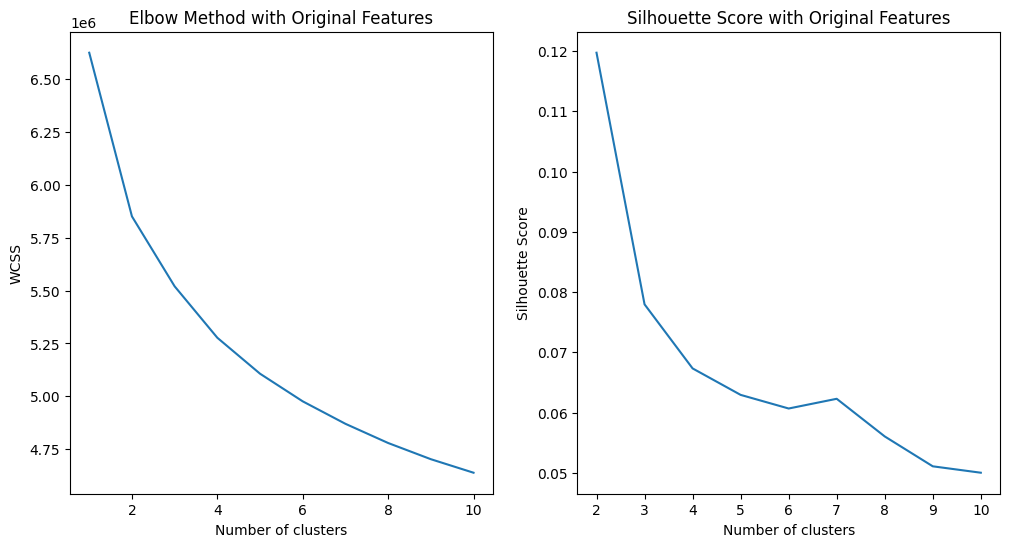

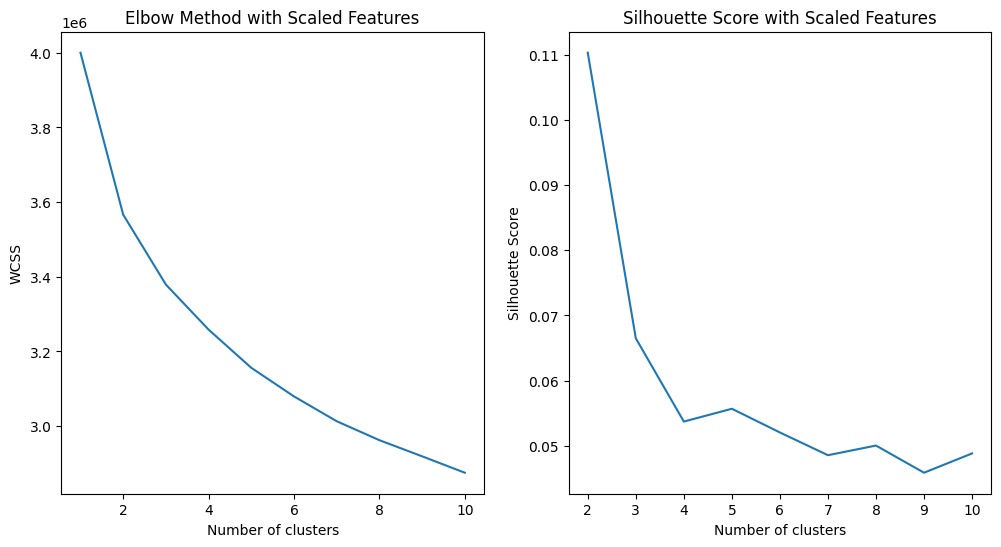

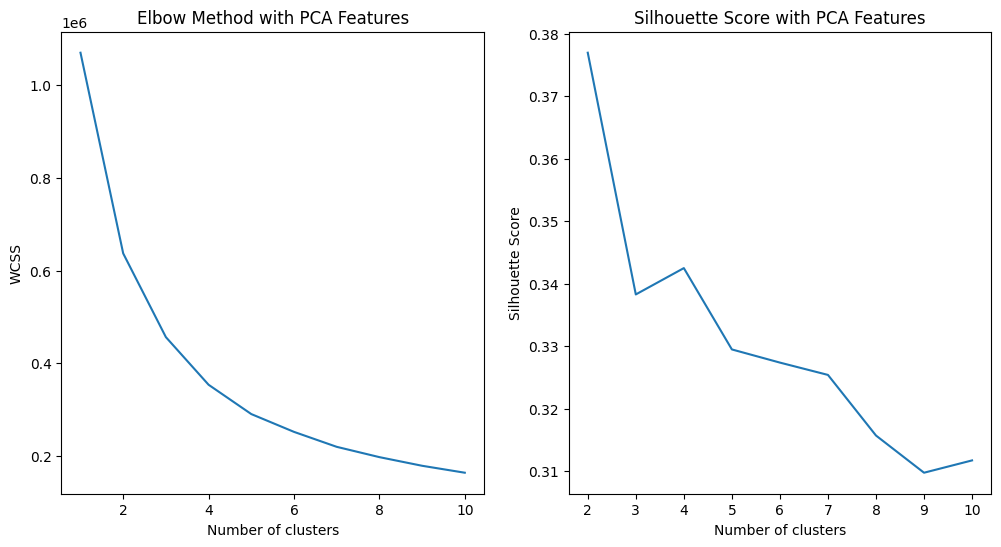

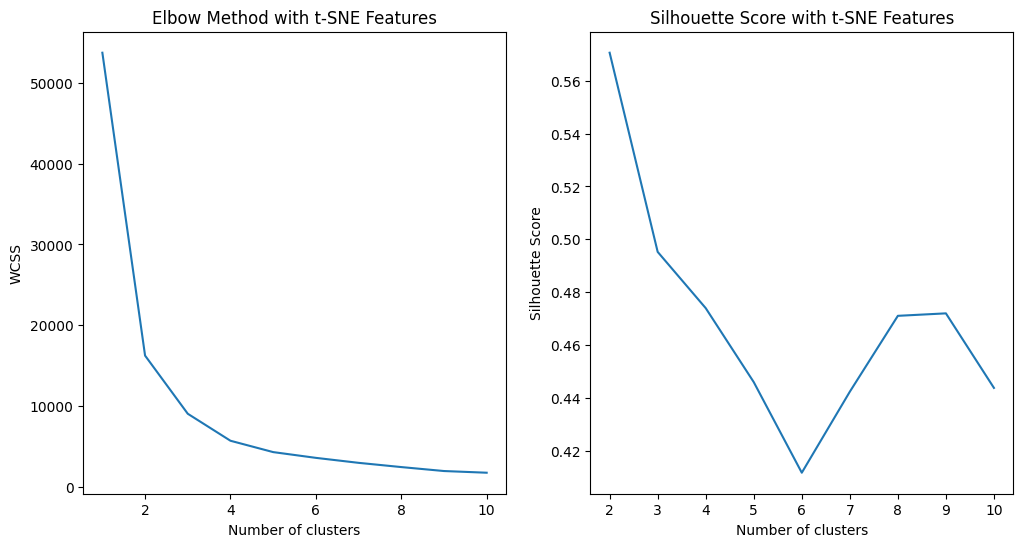

In [9]:
def evaluate_clustering(features, feature_name):
    # 肘部法则
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 11), wcss)
    plt.title(f'Elbow Method with {feature_name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

    # 轮廓系数法则
    silhouette_scores = []
    for i in range(2, 11):  # 轮廓系数至少需要2个聚类
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(features)
        score = silhouette_score(features, kmeans.labels_)
        silhouette_scores.append(score)

    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores)
    plt.title(f'Silhouette Score with {feature_name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# 分别计算经过不同操作的肘部法则效果
evaluate_clustering(features, 'Original Features')
evaluate_clustering(features_scaled, 'Scaled Features')
evaluate_clustering(features_pca, 'PCA Features')
evaluate_clustering(features_tsne, 't-SNE Features')

- 肘部法则图：展示了聚类数量与聚类内误差平方和（WCSS）的关系。随着聚类数量的增加，WCSS 通常会减少，因为样本会更接近它们的中心点。肘部法则图通常呈现一个向下的弯曲，而“肘部”点是曲线开始平缓的地方，即增加更多聚类不会显著降低 WCSS 的点。从图中可以看出，当聚类数量从2增加到3时，WCSS的下降速度变缓，因此可能的最佳聚类数量为3。

- 轮廓系数图：表示不同聚类数量下的轮廓系数值。轮廓系数衡量了样本与同一聚类中其他样本的相似程度以及与最近的其他聚类样本的不同程度。轮廓系数的范围是 -1 到 1，值越高表示聚类效果越好。在图中，轮廓系数在聚类数量为2时最高，这表明在当前数据集上，两个聚类提供了最佳的分隔效果。

In [10]:
# 选择聚类的数量
n_clusters = 2 # 您可以根据需要调整聚类的数量

# 使用显式的 n_init 参数值, 执行K-means聚类
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(features_tsne)

KMeans(n_clusters=2, n_init=10, random_state=42)

3. 分析聚类结果

Silhouette Score: 0.5705748200416565


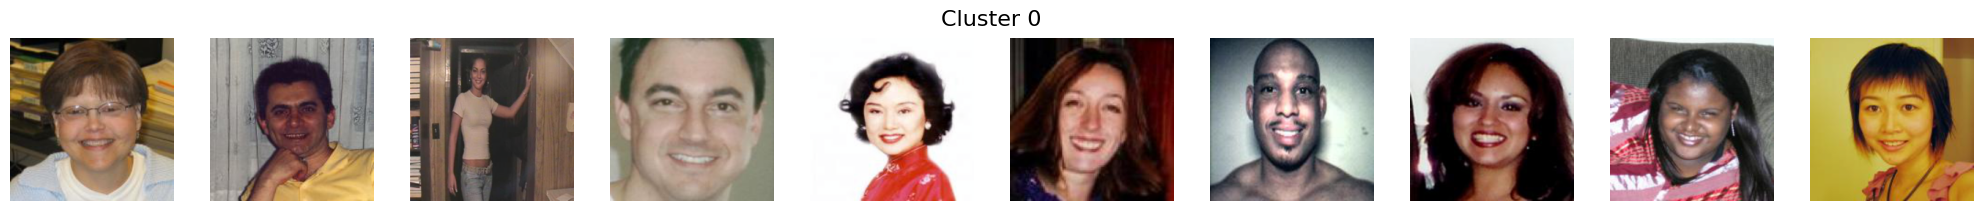

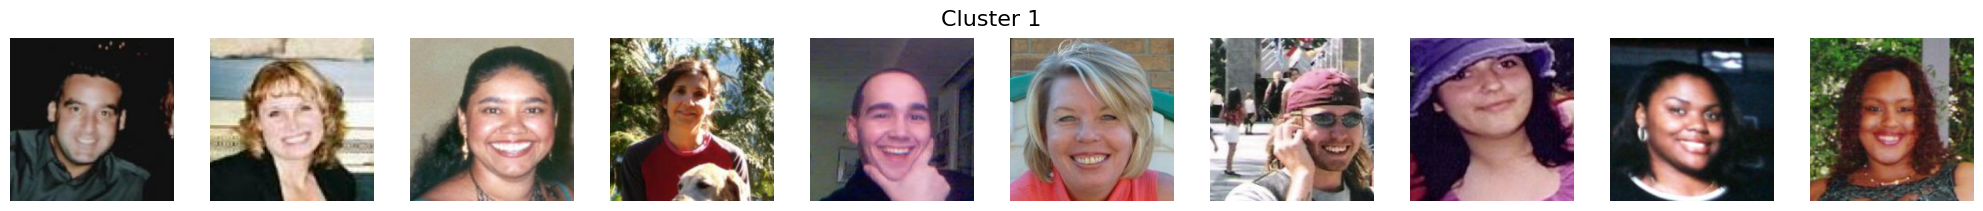

In [11]:

# 计算轮廓系数
silhouette_avg = silhouette_score(features_tsne, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

labels = kmeans.labels_

for cluster in range(n_clusters):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2), constrained_layout=True)
    fig.suptitle(f'Cluster {cluster}', fontsize=16)
    cluster_indices = np.where(labels == cluster)[0]
    for ax, idx in zip(axes, cluster_indices[:10]):
        img = dataset[idx].permute(1, 2, 0).numpy()
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        ax.axis('off')
    plt.show()


# 9 Conclusions

我们对 Genki4k 数据集进行了图像分类和聚类分析，我们使用了预训练的 ResNet 模型，对图片进行了特征提取，然后使用了 PCA 和 t-SNE 方法，对特征向量进行了降维，最后使用了 K-means 算法，对降维后的特征向量进行了聚类，得到了每张图片的聚类标签。我们使用了轮廓系数对聚类结果进行了比较和评估，发现聚类的效果是非常好的，聚类的质量和性能都比较高。

我们的工作有以下几个优点：

- 我们使用了预训练的 ResNet 模型，对图片进行了特征提取，这样可以利用模型已经学习到的高层语义特征，提高聚类的效果，同时也节省了训练模型的时间和资源。
- 我们使用了 PCA 和 t-SNE 方法，对特征向量进行了降维，这样可以减少计算的复杂度，同时方便可视化和聚类。我们还比较了 PCA 和 t-SNE 的结果，发现 t-SNE 可以更好地保持数据的局部相似度，发现数据中的复杂结构。
- 我们使用了 K-means 算法，对降维后的特征向量进行了聚类，这是一种简单而有效的聚类方法，它可以快速地在大量数据上运行，且易于实现和理解。我们还使用了肘部法则和轮廓系数法，选择了合适的聚类数量，以达到最佳的聚类效果。

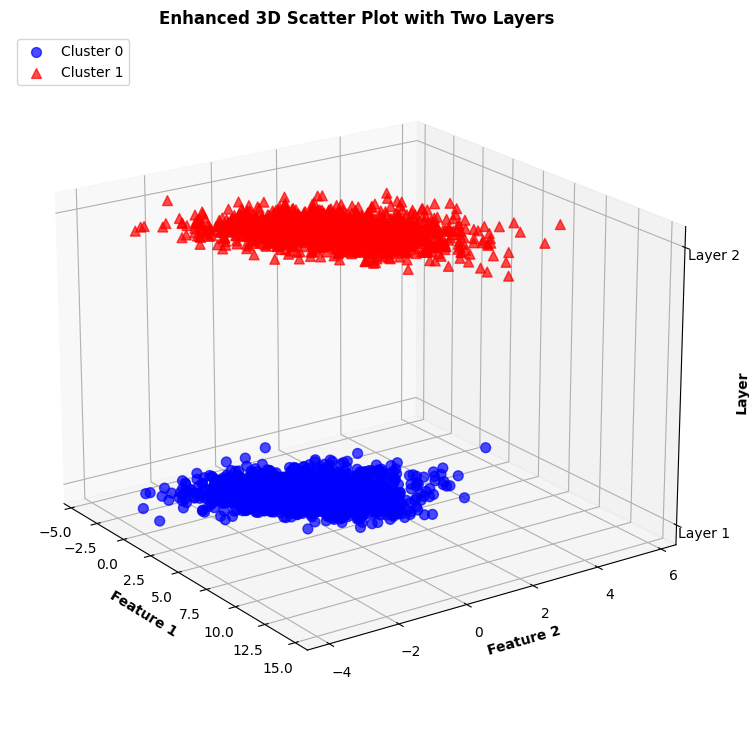

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# 假设 features 是样本特征矩阵，kmeans.labels_ 是聚类标签数组
labels = kmeans.labels_

# 选择颜色和标记
colors = ['b', 'r']  # 假设只有两个聚类
markers = ['o', '^']  # 比如圆形和三角形

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.grid(True)  # 添加网格线

# 使用两个特征绘制散点图，并通过调整z轴的值来分层
z_values_layer1 = 1  # 第一层
z_values_layer2 = 2  # 第二层

# 第一层
cluster_0_indices = (labels == 0)
ax.scatter(features[cluster_0_indices, 0], features[cluster_0_indices, 1], zs=z_values_layer1, 
           zdir='z', s=50, c=colors[0], depthshade=True, marker=markers[0], alpha=0.7, label='Cluster 0')

# 第二层
cluster_1_indices = (labels == 1)
ax.scatter(features[cluster_1_indices, 0], features[cluster_1_indices, 1], zs=z_values_layer2, 
           zdir='z', s=50, c=colors[1], depthshade=True, marker=markers[1], alpha=0.7, label='Cluster 1')

# 设置坐标轴标签
ax.set_xlabel('Feature 1', fontweight='bold')
ax.set_ylabel('Feature 2', fontweight='bold')
ax.set_zlabel('Layer', fontweight='bold')

# 设置坐标轴刻度标签
ax.set_zticks([z_values_layer1, z_values_layer2])
ax.set_zticklabels(['Layer 1', 'Layer 2'])

# 设置标题
plt.title('Enhanced 3D Scatter Plot with Two Layers', fontweight='bold')

# 添加图例
plt.legend(loc='upper left')

# 设置视角
ax.view_init(elev=20., azim=-35)

plt.show()